<a href="https://colab.research.google.com/github/arkapravo-dey/KNN_Classifier_Practice/blob/main/K_Nearest_Neighbours_Algorithm_Basic_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries numpy and pandas
import numpy as np
import pandas as pd

In [2]:
#loading the iris dataset in datframe df
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#importing the other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
#encoding the text labels 'setosa','versicolor'and 'verginica'to numeric labels 0,1 and 2
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [6]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species'].values

In [7]:
#spliting the total dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#scaling the numeric labels of X in between 0 and 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#KNeighboursClassifier is called with k specified as 5
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
# KNN model is trained on X_train and y_train
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
#y_pred is calculated by applying knn to X_test
y_pred = knn.predict(X_test)

In [12]:
#Accuracy is calculated by calling function accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [13]:
#Confusion matrix is printed
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
#to get the best value of k, it is varied from 1 to 25 and the accuracies are plotted
scores = []
for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

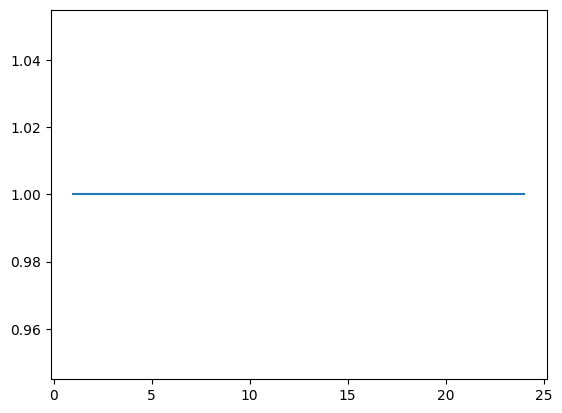

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,25),scores)

In [17]:
#varying k from 1 to 24 gives accuracy 100% for all cases